In [44]:
%matplotlib inline

# X' matrices (nuc norm < 1)

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix is of the form:
# a b
# c d

NUM_SAMPLES = 10000

A = []
B = []
C = []
D = []

for i in range(NUM_SAMPLES):
    # pick a random matrix
    M = np.random.randn(2, 2)
    
    # make sure |s1| + |s2| <= 1
    M = M/np.linalg.norm(np.linalg.svd(M)[1],ord=1)
    
    A.append(M[0,0])
    B.append(M[0,1])
    C.append(M[1,0])
    D.append(M[1,1])

In [4]:
def plot4x4(A,B,C,D):
          # A     B     C     D
    fig, ((ax11, ax12, ax13, ax14),
          (ax21, ax22, ax23, ax24),
          (ax31, ax32, ax33, ax34),
          (ax41, ax42, ax43, ax44)) = plt.subplots(4, 4, sharex='col', sharey='row')

    # First row
    ax11.plot(A, A, '*')
    ax11.set_title("A")
    ax11.set_ylabel("A")

    ax12.plot(A, B, '*')
    ax12.set_title("B")

    ax13.plot(A, C, '*')
    ax13.set_title("C")

    ax14.plot(A, D, '*')
    ax14.set_title("D")

    # Second row
    ax21.plot(B, A, '*')
    ax21.set_ylabel("B")
    ax22.plot(B, B, '*')
    ax23.plot(B, C, '*')
    ax24.plot(B, D, '*')

    # Third row
    ax31.plot(C, A, '*')
    ax31.set_ylabel("C")
    ax32.plot(C, B, '*')
    ax33.plot(C, C, '*')
    ax34.plot(C, D, '*')

    # Fourth row
    ax41.plot(D, A, '*')
    ax41.set_ylabel("D")
    ax42.plot(D, B, '*')
    ax43.plot(D, C, '*')
    ax44.plot(D, D, '*')

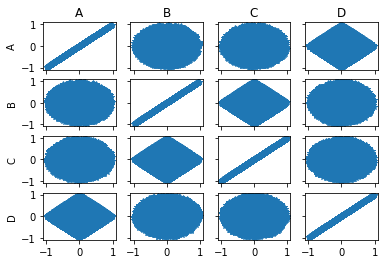

In [47]:
plot4x4(A,B,C,D)

Notice that the most interesting are the dependencies between A and D and B and C.

In [48]:
def plot2x2(A,B,C,D):
    # A
    # B
    # |
    # V
          #  C     D
    fig, ((ax11, ax12),
          (ax21, ax22)) = plt.subplots(2, 2, sharex='col', sharey='row')

    # First row
    ax11.plot(A, C, '*')
    ax11.set_title("C")
    ax11.set_ylabel("A")

    ax12.plot(A, D, '*')
    ax12.set_title("D")

    # Second row
    ax21.plot(B, C, '*')
    ax21.set_ylabel("B")
    ax22.plot(B, D, '*')

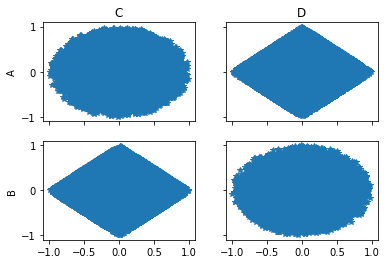

In [49]:
plot2x2(A,B,C,D)

# Now the cone generator

Cone generator = {X' - X}, where X = $e_1^T$ * $e_1$

I.e. B, C, D are not changed, but need to subtract 1 from A

In [50]:
A_0 = np.array(A)
A_0 = A_0 - 1

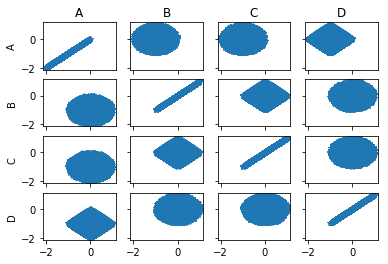

In [51]:
plot4x4(A_0,B,C,D)

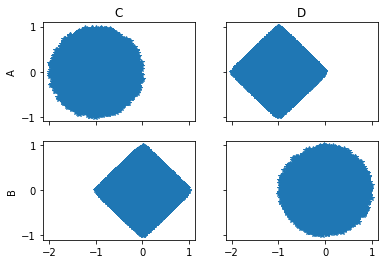

In [52]:
plot2x2(A_0,B,C,D)

# Now let's make the cone

Cone = k * "cone generator", where k is apositive number

In [53]:
B_0 = np.array(B)
C_0 = np.array(C)
D_0 = np.array(D)

A_1 = A_0 * 2
B_1 = B_0 * 2
C_1 = C_0 * 2
D_1 = D_0 * 2

A_1[A_1 > 1] = 1
B_1[B_1 > 1] = 1
C_1[C_1 > 1] = 1
D_1[D_1 > 1] = 1

A_1[A_1 < -1] = -1
B_1[B_1 < -1] = -1
C_1[C_1 < -1] = -1
D_1[D_1 < -1] = -1

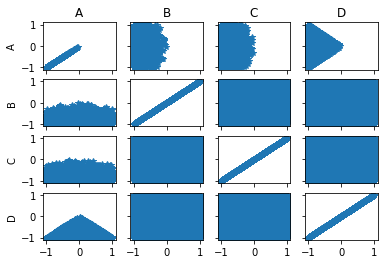

In [54]:
plot4x4(A_1,B_1,C_1,D_1)

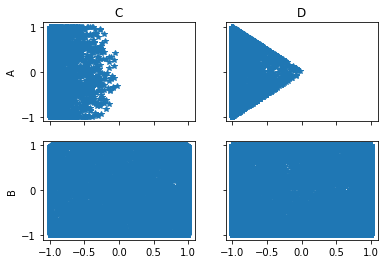

In [55]:
plot2x2(A_1,B_1,C_1,D_1)

So, roughly, from the plots above:

* B is not related with C
* B is not related with D
* C is not related with D

* A can be any negative number (or zero)

* for all choices of A, B is negative (or zero)
* for all choices of A, C is negative (or zero)
* D = - |A|

So, in AxB and AxC subspaces, the cone is half-plane.
In AxD subspace, the cone is an actual cone.
In other dimensions, the cone is not constrained

Now this pretty much completes geometrical description of the cone. But since we are dealing with matrices, it might also be interesting to think if the cone as a set of linear operations.

# Cone for symmetric matrices

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix is of the form:
# a b
# c d

NUM_SAMPLES = 100000

A = []
B = []
C = []
D = []

for i in range(NUM_SAMPLES):
    # pick a random matrix
    M = np.random.randn(2, 2)
    M = (M + np.matrix.transpose(M))/2
    
    # make sure |s1| + |s2| <= 1
    M = M/np.linalg.norm(np.linalg.svd(M)[1],ord=1)
    
    A.append(M[0,0])
    B.append(M[0,1])
    C.append(M[1,0])
    D.append(M[1,1])

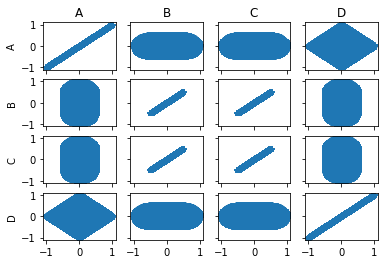

In [85]:
plot4x4(A,B,C,D)

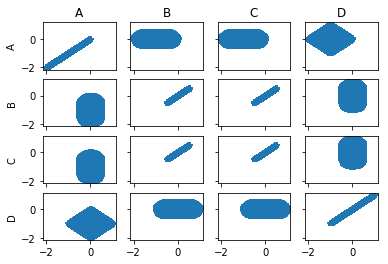

In [86]:
A_0 = np.array(A)
A_0 = A_0 - 1
plot4x4(A_0,B,C,D)

In [87]:
B_0 = np.array(B)
C_0 = np.array(C)
D_0 = np.array(D)

A_1 = A_0 * 2
B_1 = B_0 * 2
C_1 = C_0 * 2
D_1 = D_0 * 2

A_1[A_1 > 1] = 1
B_1[B_1 > 1] = 1
C_1[C_1 > 1] = 1
D_1[D_1 > 1] = 1

A_1[A_1 < -1] = -1
B_1[B_1 < -1] = -1
C_1[C_1 < -1] = -1
D_1[D_1 < -1] = -1

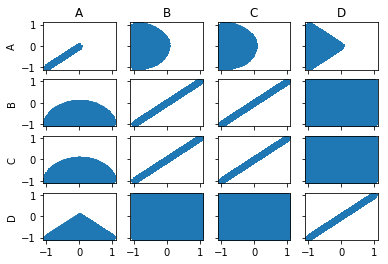

In [88]:
plot4x4(A_1,B_1,C_1,D_1)

# Cone for anti-symmetric matrices

In this case, things are much simpler, for X' we would end up with a family of matrices p*S, where |p|<=1/2 and S is

$$
 \begin{bmatrix}0 & 1 \\-1 & 0 \end{bmatrix} 
$$

And the cone will be all matrices of the form

$$
 k\begin{bmatrix}-1 & p \\-p & 0 \end{bmatrix} 
$$

where k is a positive number

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix is of the form:
# a b
# c d

NUM_SAMPLES = 100

A = []
B = []
C = []
D = []

dk = 2/NUM_SAMPLES
dp = 1/NUM_SAMPLES
for pi in range(NUM_SAMPLES):
    for ki in range(NUM_SAMPLES):
        p = pi*dp - 1/2
        k = ki*dk
    
        M = np.array([[-1, -p], [p, 0]])
        M = k*M

        A.append(M[0,0])
        B.append(M[0,1])
        C.append(M[1,0])
        D.append(M[1,1])

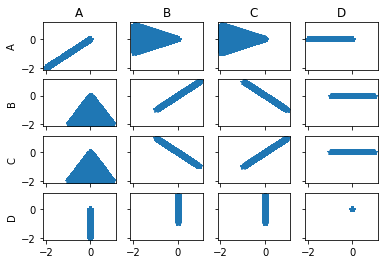

In [33]:
plot4x4(A,B,C,D)

# What I would like to get in the end

From the pictures above, $cone(\{X' - X : ||X'|| < 1\})$, where

$$
X = \begin{bmatrix}1 & 0 \\0 & 0 \end{bmatrix} 
$$

should be made as follows:

$X' = \begin{bmatrix}a & b \\c & d \end{bmatrix}$ has constraints:

$$a^2 + b^2 \leq 1$$
$$a^2 + c^2 \leq 1$$
$$d^2 + b^2 \leq 1$$
$$d^2 + c^2 \leq 1$$
$$|a| + |d| \leq 1$$

$Y = X' - X$ has constraints:

$$a^2 + (b+1)^2 \leq 1$$
$$a^2 + (c+1)^2 \leq 1$$
$$d^2 + b^2 \leq 1$$
$$d^2 + c^2 \leq 1$$
$$|a| + |d+1| \leq 1$$

Now, once I get the equations above, the cone would come out naturally:

$$b \leq 0 \text{ for all } a$$
$$c \leq 0 \text{ for all } a$$
$$d \leq |a|$$
